<a href="https://colab.research.google.com/github/juanmggb/maestria/blob/main/mc_fb_optimization/mc_fb_optimization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install pyDOE

In [ ]:
pip install geneticalgorithm

In [285]:
# In order to access the package you need to have its path. The path required is the path WHERE that package is soterd, not it path
# sys.path.insert(1, 'd:\\DYNAMICAL SIMULATION\\maestria\\maestria')

In [ ]:
!git clone https://github.com/juanmggb/maestria.git

In [287]:
cd maestria

/content/maestria/maestria


In [288]:
ls

'-'

In [289]:
# Importar modulos
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from geneticalgorithm import geneticalgorithm as ga
import sys
from time import time as clock
import random

In [290]:
import utilis.functions as fn
from utilis.models import inhibition_model_fb
from utilis.solvers import euler

In [291]:
def inflow_rate(t):

    return F1

In [292]:
def inflow_rate_model(u):
    global F1

    F1 = u

    return euler(inhibition_model_fb, x0, 0, tf, dt, inflow_rate, mu_max, yxs, ks, ypx, ki, sf).T

In [293]:
# Parameters
mu_max = 1.20
yxs = 0.2
ks = 280
ypx = 4
ki = 0.3
sf = 50

In [294]:
# Initial conditions
x0 = np.array([0.2, 40, 10])

# Integration time
tf = 100
dt = 0.1
time = np.arange(0, tf, dt)

# Solve ODEs
x, s, V = inflow_rate_model(1)

In [ ]:
predicted = fn.create_df_fb(time, x, s, V)
predicted.head()

In [ ]:
fn.plot_data_fb(predicted)

In [ ]:
plt.plot(time, V)

In [ ]:
plt.plot(time, [inflow_rate(t) for t in time])

In [299]:
def objective_funcion_inflow(u):
    x, _, V = inflow_rate_model(u)
    return x[-1]*V[-1]

In [300]:
u = np.arange(0, 3, 0.1)
objective_values = [objective_funcion_inflow(u_val) for u_val in u]

In [ ]:
plt.plot(u, objective_values)

In [302]:
def objective_funcion_inflow_wraper(u):
    u = u[0]
    return -objective_funcion_inflow(u)

In [332]:
# Configuramos algoritmo genetico
algorithm_param_inflow = {'max_num_iteration': 20,
                   'population_size':20,
                   'mutation_probability':0.1,
                   'elit_ratio': 0.01,
                   'crossover_probability': 0.8,
                   'parents_portion': 0.3,
                   'elistism':True,
                   'crossover_type':'uniform',
                   'max_iteration_without_improv':None}

In [333]:
# Establecer los rangos de busqueda para las variables de decision
varbound_inflow=np.array([
    [0, 3],
])

In [335]:
# LLamar el algortimo genetico para realizar la optimizacion
model_inflow=ga(function=objective_funcion_inflow_wraper,
         dimension=1,
         variable_type='real',
         variable_boundaries=varbound_inflow,
         algorithm_parameters=algorithm_param_inflow)

In [ ]:
# Realizar la busqueda
best_fitness_inflow = []
best_variables_inflow = []
start_time = clock()
for i in range(5):
    model_inflow.run()
    best_fitness_inflow.append(model_inflow.best_function)
    best_variables_inflow.append(model_inflow.best_variable)
end_time = clock()

In [337]:
total_time = end_time - start_time 
print(f"Total time: {total_time:.3f}s")
print(f"Average time: {(total_time/5):.3f}s")

Total time: 18.250s
Average time: 3.650s


In [338]:
model_inflow.best_function

-694.1413515875031

In [339]:
model_inflow.best_variable

array([0.94636088])

'c' : cyan

'm' : magenta

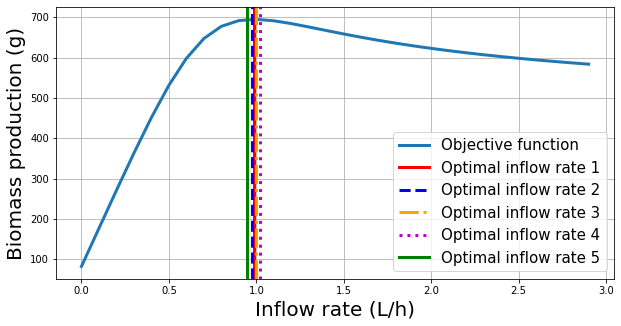

In [353]:
fig, ax = plt.subplots(figsize=(10, 5))

# Plot the data
ax.plot(u, objective_values, lw = 3, label = "Objective function")

i=0
line_styles = ["-","--", "-.", ":","-"]
colors = ["r", "b", "orange", "m", "g"]
for best_var in best_variables_inflow:
    ls = line_styles[i]
    c = colors[i]
    i+=1
    ax.axvline(x=best_var, lw=3, label = "Optimal inflow rate " + str(i), linestyle= ls, color = c)

plt.xlabel("Inflow rate (L/h)", size = 20)
plt.ylabel("Biomass production (g)", size = 20)
plt.grid()
plt.legend(fontsize=15)
plt.show()

In [356]:
def inflow_rate_profle(t):
    p1, p2, p3, p4, p5, p6, p7, p8, p9, p10 = F2
    if t < 10:
        return p1
    elif t < 20:
        return p2
    elif t < 30:
        return p3
    elif t < 40:
        return p4
    elif t < 50:
        return p5
    elif t < 60:
        return p6
    elif t < 70:
        return p7
    elif t < 80:
        return p8
    elif t < 90:
        return p9
    else: 
        return p10

In [357]:
def inflow_rate_profile_model(profile):
    global F2 

    F2 = profile
    return  euler(inhibition_model_fb, x0, 0, tf, dt, inflow_rate_profle, mu_max, yxs, ks, ypx, ki, sf).T

In [358]:
# Solve the ODEs
profile = [0, 1, 0, 1, 2, 0, 1, 0, 0, 2]
x, s, V = inflow_rate_profile_model(profile)

In [359]:
predicted_profile = fn.create_df_fb(time, x, s, V)
predicted_profile.tail()

,t,x,s,V
995,99.5,7.793961,9.902886,79.0
996,99.6,7.803235,9.859374,79.2
997,99.7,7.812469,9.816043,79.4
998,99.8,7.821663,9.772897,79.6
999,99.9,7.830817,9.729936,79.8


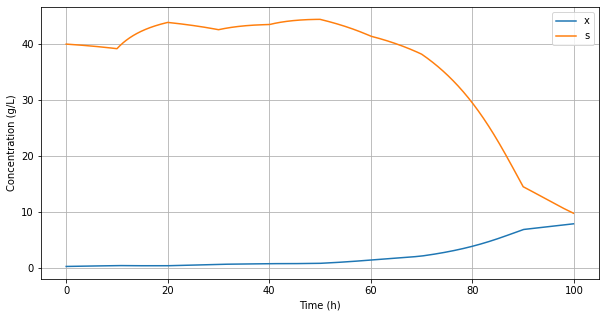

In [360]:
fn.plot_data_fb(predicted_profile)

In [ ]:
plt.plot(time, V)

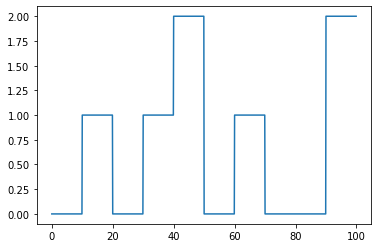

In [361]:
plt.plot(time, [inflow_rate_profle(t) for t in time])

In [362]:
x[-1]*V[-1]

624.8992316030655

In [319]:
def objective_funcion_profile(profile):
    x, _, V = inflow_rate_profile_model(profile)
    return x[-1]*V[-1]

In [363]:
objective_funcion_profile(profile)

624.8992316030655

In [364]:
def objective_funcion_profile_wraper(profile):
    return -objective_funcion_profile(profile)

In [368]:
# Configuramos algoritmo genetico
algorithm_param_profile = {'max_num_iteration': 50,
                   'population_size':50,
                   'mutation_probability':0.1,
                   'elit_ratio': 0.01,
                   'crossover_probability': 0.8,
                   'parents_portion': 0.3,
                   'elistism':True,
                   'crossover_type':'uniform',
                   'max_iteration_without_improv':None}

In [369]:
# Establecer los rangos de busqueda para las variables de decision
varbound_profile=np.array([
    [0, 2],
    [0, 2],
    [0, 2],
    [0, 2],
    [0, 2],
    [0, 2],
    [0, 2],
    [0, 2],
    [0, 2],
    [0, 2]
])

In [370]:
# LLamar el algortimo genetico para realizar la optimizacion
model_profile=ga(function=objective_funcion_profile_wraper,
         dimension=10,
         variable_type='real',
         variable_boundaries=varbound_profile,
         algorithm_parameters=algorithm_param_profile)

runs = 5

 The best solution found:
 [0.00244104 0.02857044 0.03241536 0.6366433  0.82963457 1.93030142
 1.83924982 1.99540511 1.90072464 1.76612255]

 Objective function:
 -824.0363461799808


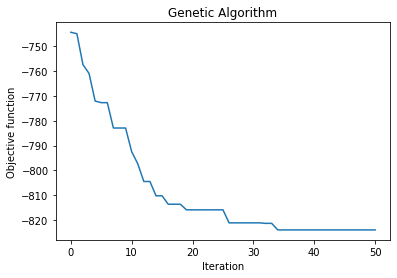

 The best solution found:
 [0.03001358 0.00487315 0.22481362 0.18964609 0.96174327 1.81388471
 1.94631516 1.85267659 1.99016182 1.88075663]

 Objective function:
 -824.3333984210614


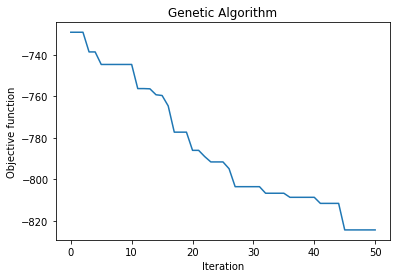

 The best solution found:
 [0.12458433 0.14670547 0.26685301 0.03457361 1.02062326 1.89721347
 1.95963393 1.90459627 1.87937841 1.8603951 ]

 Objective function:
 -808.6532397344696


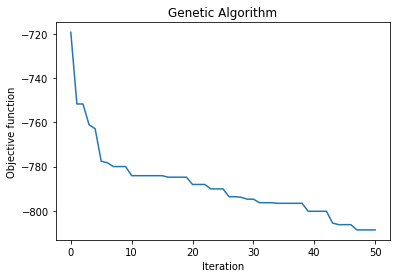

 The best solution found:
 [0.07698031 0.0541326  0.0925917  0.3329799  1.42803458 1.63995729
 1.77352973 1.7129129  1.90678225 1.94893063]

 Objective function:
 -812.1961538835825


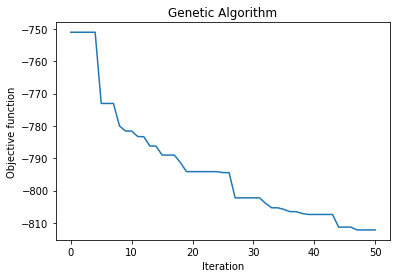

 The best solution found:
 [0.05785412 0.02687734 0.00523435 0.17721601 1.37173177 1.75910476
 1.99061335 1.62821714 1.96622863 1.92658092]

 Objective function:
 -823.6896797522069


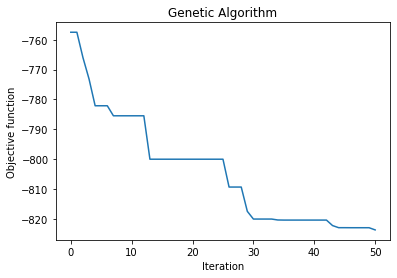

In [373]:
best_fitness_profile = []
best_variables_profile = np.empty((runs, 10))

start_time_profile = clock()
for i in range(runs):
    model_profile.run()
    best_fitness_profile.append(model_profile.best_function)
    best_variables_profile[i, :] = model_profile.best_variable
end_time_profile = clock()

In [374]:
total_time_profile = end_time_profile - start_time_profile 
print(f"Total time: {total_time_profile:.3f}")
print(f"Average time: {(total_time_profile/5):.3f}")

Total time: 135.743
Average time: 27.149


In [375]:
best_fitness_profile

[-824.0363461799808,
 -824.3333984210614,
 -808.6532397344696,
 -812.1961538835825,
 -823.6896797522069]

In [376]:
best_variables_profile

array([[0.00244104, 0.02857044, 0.03241536, 0.6366433 , 0.82963457,
        1.93030142, 1.83924982, 1.99540511, 1.90072464, 1.76612255],
       [0.03001358, 0.00487315, 0.22481362, 0.18964609, 0.96174327,
        1.81388471, 1.94631516, 1.85267659, 1.99016182, 1.88075663],
       [0.12458433, 0.14670547, 0.26685301, 0.03457361, 1.02062326,
        1.89721347, 1.95963393, 1.90459627, 1.87937841, 1.8603951 ],
       [0.07698031, 0.0541326 , 0.0925917 , 0.3329799 , 1.42803458,
        1.63995729, 1.77352973, 1.7129129 , 1.90678225, 1.94893063],
       [0.05785412, 0.02687734, 0.00523435, 0.17721601, 1.37173177,
        1.75910476, 1.99061335, 1.62821714, 1.96622863, 1.92658092]])

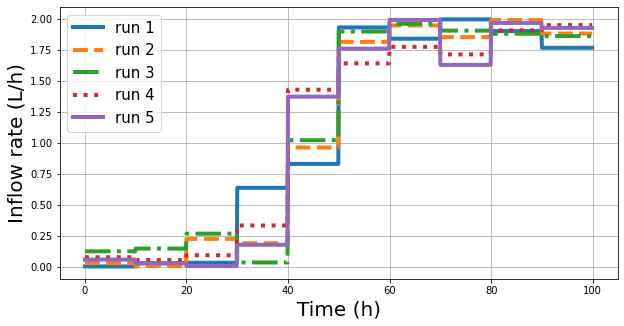

In [377]:
plt.figure(figsize=(10,5))
line_styles = ["-", "--","-.", ":", "-"]
i = 0
for best_var in best_variables_profile:
    ls = line_styles[i]
    i+=1
    F2 = best_var
    plt.plot(time, [inflow_rate_profle(t) for t in time], linestyle = ls, label = "run " + str(i), lw = 4)
plt.xlabel("Time (h)", size = 20)
plt.ylabel("Inflow rate (L/h)", size = 20)
plt.grid()
plt.legend(fontsize=15)
plt.show()

'-' solid
'--' dashed
'-.' dashdot
':' dotted

<ipython-input-383-04b69f0153cb>:10: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(2,2,1)
<ipython-input-383-04b69f0153cb>:13: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(2,2,2)
<ipython-input-383-04b69f0153cb>:16: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and

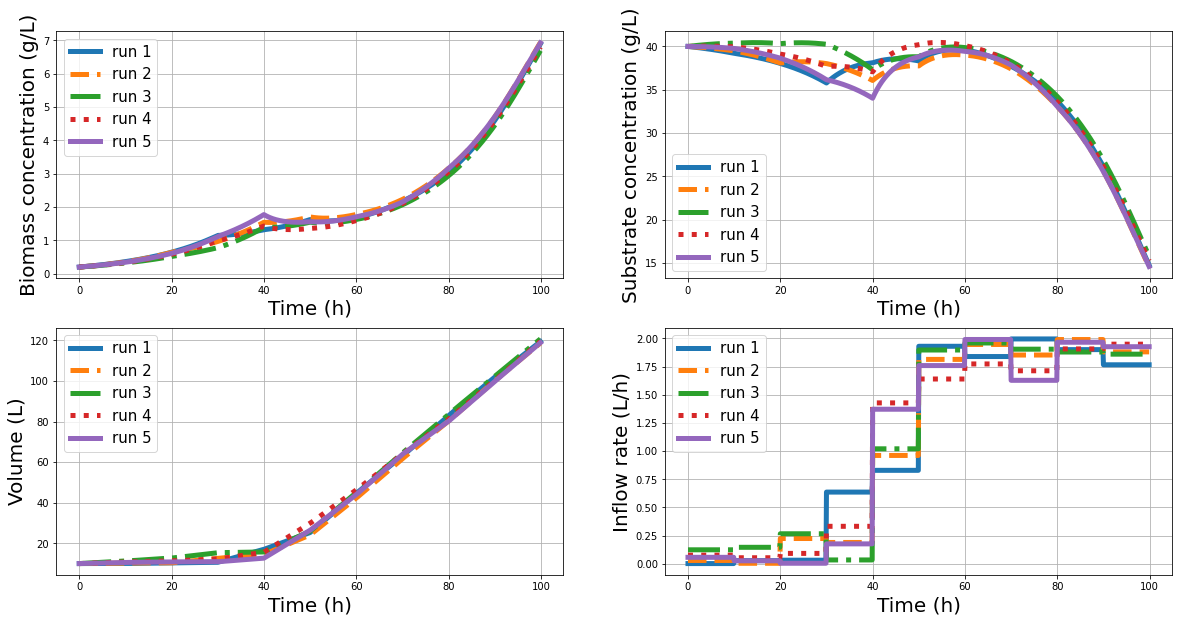

In [383]:
plt.figure(figsize = (20, 10))
line_styles = ["-", "--","-.", ":", "-"]
i = 0
for best_var in best_variables_profile:
    ls = line_styles[i]
    i+=1
    F2 = best_var
    x, s, V = inflow_rate_profile_model(F2)

    plt.subplot(2,2,1)
    plt.plot(time, x, lw = 5, label = "run " + str(i), linestyle=ls)

    plt.subplot(2,2,2)
    plt.plot(time, s, lw = 5, label = "run " + str(i), linestyle=ls)
    
    plt.subplot(2,2,3)
    plt.plot(time, V, lw = 5,label = "run " + str(i), linestyle=ls)

    plt.subplot(2,2,4)
    plt.plot(time, [inflow_rate_profle(t) for t in time], linestyle = ls, label = "run " + str(i), lw = 5)

plt.subplot(2,2,1)
plt.xlabel("Time (h)", size = 20)
plt.ylabel("Biomass concentration (g/L)", size = 20)
plt.legend(fontsize=15)
plt.grid()

plt.subplot(2,2,2)
plt.xlabel("Time (h)", size = 20)
plt.ylabel("Substrate concentration (g/L)", size = 20)
plt.legend(fontsize=15)
plt.grid()

plt.subplot(2,2,3)
plt.xlabel("Time (h)", size = 20)
plt.ylabel("Volume (L)", size = 20)
plt.legend(fontsize=15)
plt.grid()

plt.subplot(2,2,4)
plt.xlabel("Time (h)", size = 20)
plt.ylabel("Inflow rate (L/h)", size = 20)
plt.grid()
plt.legend(fontsize=15)


plt.show()


In [382]:
print(x[-1],V[-1],x[-1]*V[-1] )

6.927354792560714 118.90392572887521 823.6896797522069
